# Cafe Dataset
## Data Visualization
by: Mark June Almojuela

Last Modified: 11-10-2025

This activity uses python's Pandas, matplotlib, and seaborn for data visualization.

Data Source: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training
(Kaggle)

### Initialization

In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.8 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 30.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 41.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/cleaned/clean_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


### Visualize monthly transactions

In [19]:
valid_dates = df[df['Transaction Date'].notna() & ~df['Transaction Date'].isin(['UNKNOWN', 'ERROR'])].copy()
valid_dates['Transaction Date'] = pd.to_datetime(valid_dates['Transaction Date']).copy()

valid_dates.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [28]:
# Engineer month column
valid_dates['Month'] = valid_dates['Transaction Date'].dt.to_period('M')
monthly_transactions = valid_dates.groupby('Month').size().reset_index(name='Transactions')
monthly_revenues = valid_dates.groupby('Month')['Total Spent'].sum().reset_index(name='Total Revenue')

monthly_summary = pd.merge(monthly_transactions, monthly_revenues, on='Month')
monthly_summary.head()

,Month,Transactions,Total Revenue
0,2023-01,773,6894.5
1,2023-02,698,6347.5
2,2023-03,790,6931.0
3,2023-04,728,6782.5
4,2023-05,734,6607.5


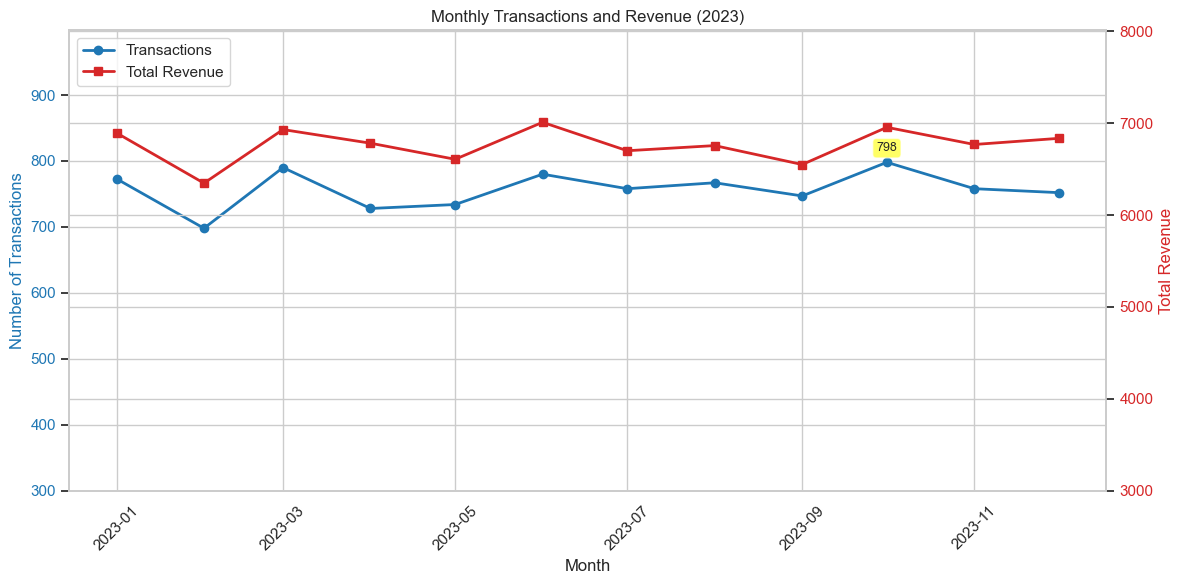

In [39]:
# Plot monthly transactions and revenue as line trends
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Use the merged monthly_summary DataFrame
x = monthly_summary['Month'].dt.to_timestamp()
y1 = monthly_summary['Transactions']
y2 = monthly_summary['Total Revenue']

# Plot transactions (left y-axis, blue)
ax1 = plt.gca()
ln1 = ax1.plot(x, y1, marker='o', linewidth=2, color='tab:blue', label='Transactions')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Transactions', color='tab:blue')
ax1.set_ylim(300, y1.max() + 200)
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45)

# Annotate the peak month for transactions
peak_idx = y1.idxmax()
ax1.annotate(f"{y1.iloc[peak_idx]}",
             xy=(x.iloc[peak_idx], y1.iloc[peak_idx]),
             xytext=(0, 8),
             textcoords='offset points',
             ha='center',
             fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.6))

# Plot revenue (right y-axis, red)
ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, marker='s', linewidth=2, color='tab:red', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='tab:red')
ax2.set_ylim(3000, y2.max() + 1000)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combine legends
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')

plt.title('Monthly Transactions and Revenue (2023)')
plt.tight_layout()
plt.show()

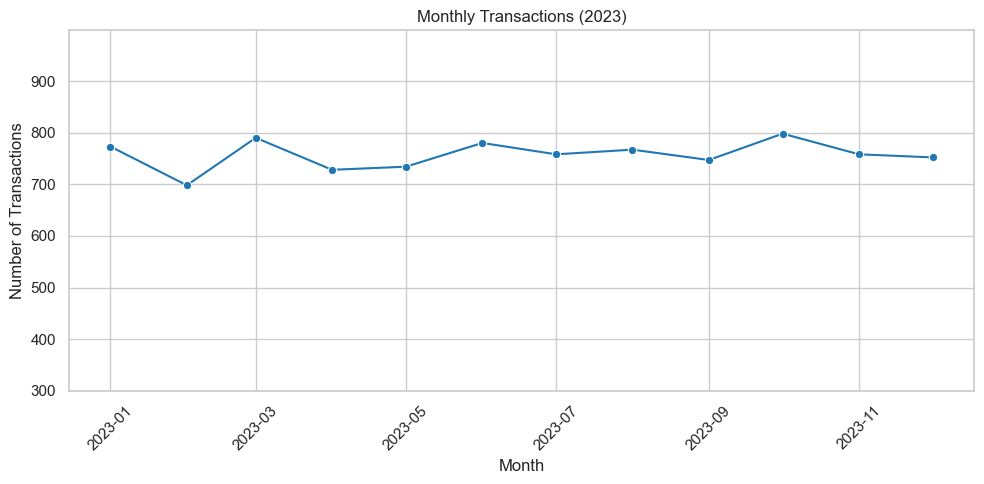

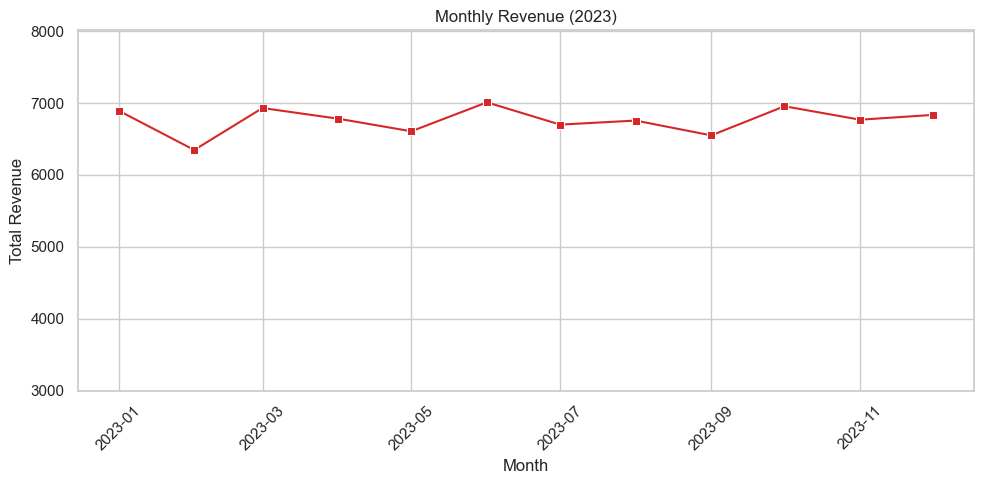

In [38]:
# Plot Transactions per Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y1, marker='o', color='tab:blue')
plt.title('Monthly Transactions (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.ylim(300, y1.max() + 200)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Revenue per Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y2, marker='s', color='tab:red')
plt.title('Monthly Revenue (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.ylim(3000, y2.max() + 1000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualize sales and transactions based on the Item

To see all unique items in the dataset, run the following in a code cell:

In [58]:
items = valid_dates['Item'].unique()

for i in items:
    print(i)

Coffee
Cake
Cookie
Salad
Smoothie
Sandwich
Tea
Juice


In [59]:
# Run all the cells below after identifying an item of interest from the printed list
item = 'Coffee'
# Reuse the valid_dates DataFrame from earlier
valid_item_date = valid_dates[valid_dates['Item'] == item].copy()
valid_item_date.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023-09
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023-06
29,TXN_1736287,Coffee,5.0,2.0,10.0,Digital Wallet,NaN,2023-06-02,2023-06
38,TXN_6688524,Coffee,4.0,2.0,8.0,ERROR,NaN,2023-06-29,2023-06
71,TXN_6420335,Coffee,1.0,2.0,2.0,Cash,Takeaway,2023-07-16,2023-07


In [60]:
# Calculate monthly transactions and revenue for the specific item
item_monthly_transactions = valid_item_date.groupby('Month').size().reset_index(name='Transactions')
item_monthly_revenues = valid_item_date.groupby('Month')['Total Spent'].sum().reset_index(name='Total Revenue')
item_monthly_summary = pd.merge(item_monthly_transactions, item_monthly_revenues, on='Month')
item_monthly_summary.head()

,Month,Transactions,Total Revenue
0,2023-01,92,574.0
1,2023-02,92,606.0
2,2023-03,109,688.0
3,2023-04,93,572.0
4,2023-05,89,534.0


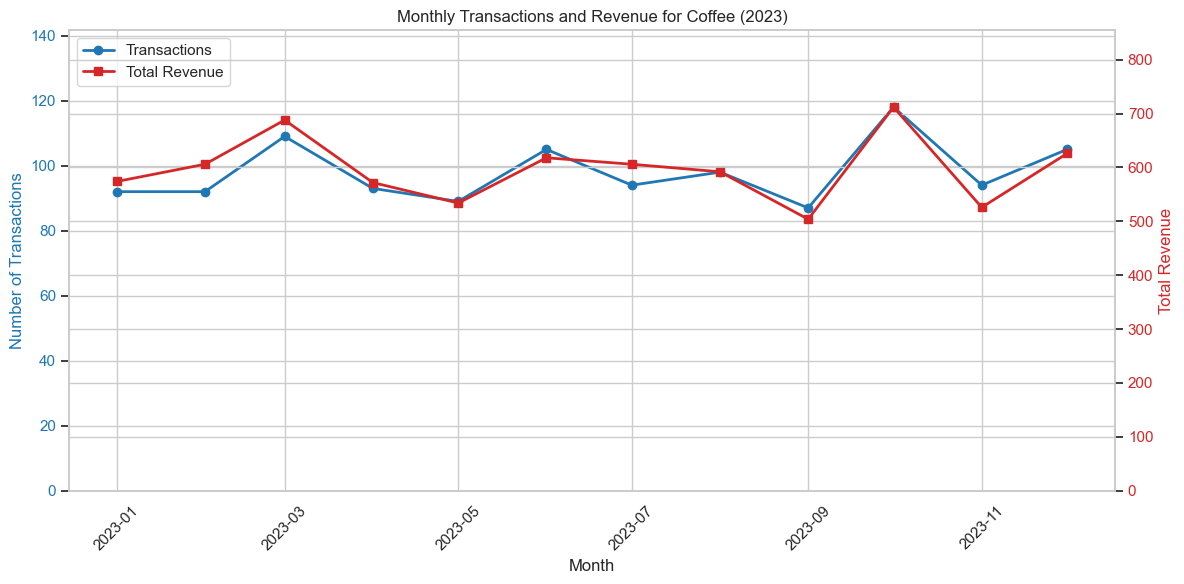

In [61]:
# Plot monthly transactions and revenue for Tea as combined plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Convert Month to timestamp for plotting
x = item_monthly_summary['Month'].dt.to_timestamp()
y1 = item_monthly_summary['Transactions']
y2 = item_monthly_summary['Total Revenue']

# Plot transactions (left y-axis, blue)
ax1 = plt.gca()
ln1 = ax1.plot(x, y1, marker='o', linewidth=2, color='tab:blue', label='Transactions')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Transactions', color='tab:blue')
ax1.set_ylim(0, y1.max() + (0.20 * y1.max()))
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45)

# Plot revenue (right y-axis, red)
ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, marker='s', linewidth=2, color='tab:red', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='tab:red')
ax2.set_ylim(0, y2.max() + (0.20 * y2.max()))
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combine legends
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')

plt.title(f'Monthly Transactions and Revenue for {item} (2023)')
plt.tight_layout()
plt.show()

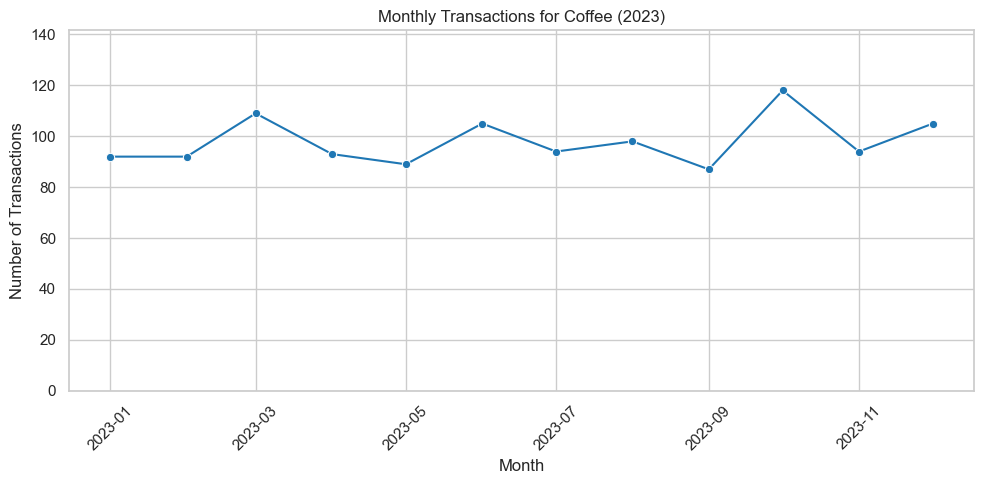

In [62]:
# Transactions per Month for Tea
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y1, marker='o', color='tab:blue')
plt.title(f'Monthly Transactions for {item} (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.ylim(0, y1.max() + (0.20 * y1.max()))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

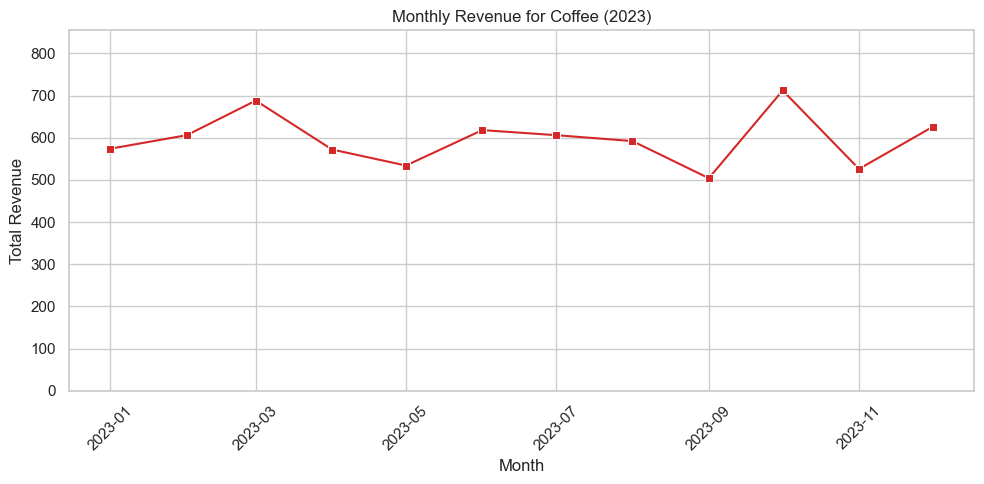

In [63]:
# Revenue per Month for Tea
plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=y2, marker='s', color='tab:red')
plt.title(f'Monthly Revenue for {item} (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.ylim(0, y2.max() + (0.20 * y2.max()))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For better visualization, use any BI tools. :)